# **HMEQ Dataset Preprocessing**

In [1]:
from src import utilities
from src import preprocessing
from src import plotting

hmeq_dataset_path = '../../datasets/CreditRiskAnalytics/hmeq.csv'
hmeq_prep_dataset_path = '../../datasets/preprocessed/hmeq/'

(CVXPY) Mar 05 01:09:48 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Mar 05 01:09:48 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [2]:
utilities.create_directory(hmeq_prep_dataset_path)

In [3]:
data = utilities.read_csv(hmeq_dataset_path, dtype={'BAD':'bool', 'REASON':'category',
                                                    'JOB':'category', 'LOAN':'float64'})
data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,True,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,True,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,True,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,True,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,False,88900.0,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,False,89000.0,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,False,89200.0,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,False,89800.0,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   bool    
 1   LOAN     5960 non-null   float64 
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: bool(1), category(2), float64(10)
memory usage: 483.5 KB


#### Plot features data types.

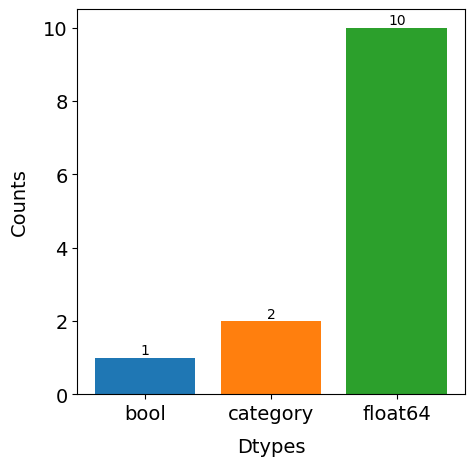

In [5]:
plotting.plot_dtypes_hist(data, '', 'Dtypes', 'Counts',
                          save_path=hmeq_prep_dataset_path + 'dtypes.pdf')

#### Data cleaning.

In [6]:
before_data_cleaning_count = len(data)

#### Rename features labels to have more meaningful names.

In [7]:
data.rename(columns={'BAD':'defaulted',
                     'LOAN':'loan-amount',
                     'MORTDUE':'existing-amount-due',
                     'VALUE':'curr-prop-val',
                     'REASON':'loan-reason',
                     'JOB':'job',
                     'YOJ':'years-at-job',
                     'DEROG':'derogatories',
                     'DELINQ':'delinquencies',
                     'CLAGE':'oldest-credit-line',
                     'NINQ':'credit-inquiries',
                     'CLNO':'credit-lines',
                     'DEBTINC':'debt-to-income'}, inplace=True)

#### Plot class distribution.

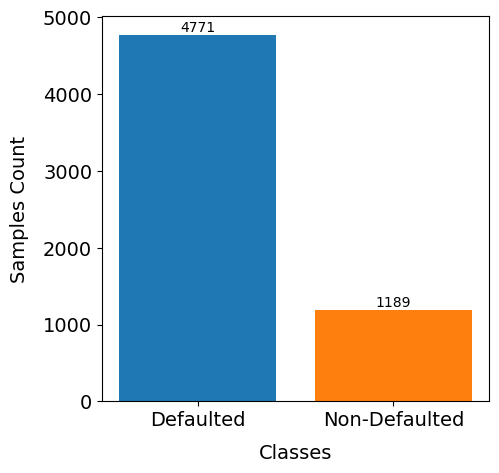

In [8]:
plotting.plot_hist(['Defaulted', 'Non-Defaulted'], data.defaulted.value_counts().values,
                   '', 'Classes', 'Samples Count',
                   save_path=hmeq_prep_dataset_path + 'class_distribution.pdf')

#### Plot missing values histogram.

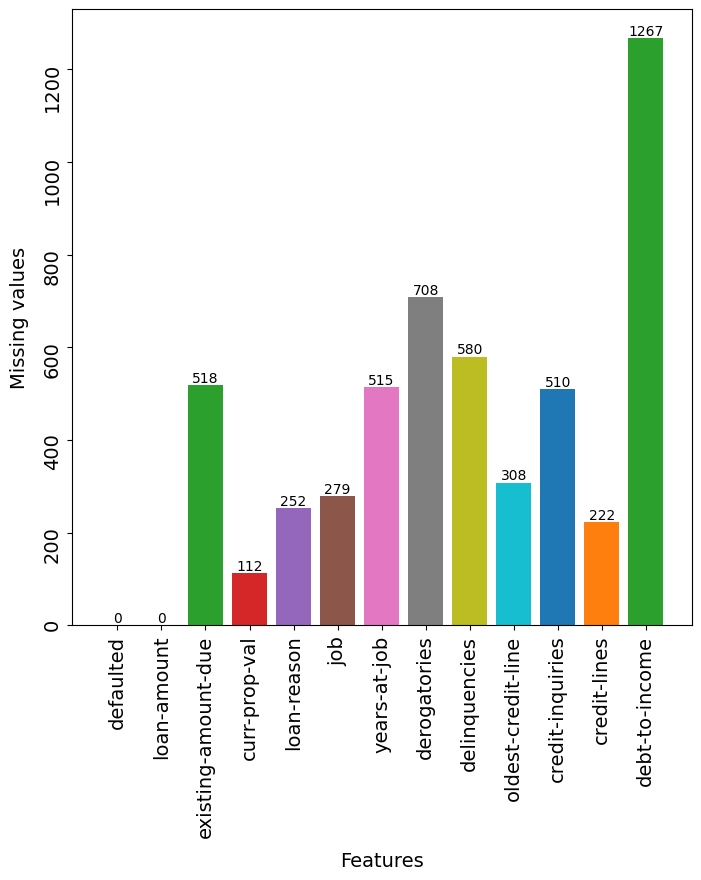

In [9]:
labels = [str(idx) for idx in data.isna().sum(axis=0).index]
values = data.isna().sum(axis=0).values
plotting.plot_hist(labels, values, '', 'Features', 'Missing values', figsize=(8,8),
                   rotated_ticks=True, save_path=hmeq_prep_dataset_path + 'missing_values-1.pdf')

#### Apply optimal binninf and WoE.

In [10]:
data, features_scores = preprocessing.opt_bin_woe(data=data, solver="cp",
                                                  outlier_detector="range",
                                                  save_path=hmeq_prep_dataset_path,
                                                  verbose=False)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:02<00:00,  4.99it/s]


In [11]:
data

,defaulted,loan-amount,existing-amount-due,curr-prop-val,loan-reason,job,years-at-job,derogatories,delinquencies,oldest-credit-line,credit-inquiries,credit-lines,debt-to-income
0,True,-1.287425,-0.431024,-0.700352,-0.138124,-0.192353,0.042021,-0.04317,-0.015692,-0.289117,0.014560,-0.636674,0.000000
1,True,-1.287425,-0.012169,0.063699,-0.138124,-0.192353,0.042021,-0.04317,-0.015692,-0.289117,0.247366,0.106763,0.000000
2,True,-1.287425,-0.431024,-0.700352,-0.138124,-0.192353,-0.189359,-0.04317,-0.015692,-0.289117,0.014560,0.106763,0.000000
3,True,-1.287425,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,False,-1.287425,0.321084,0.275257,-0.138124,0.495199,-0.262513,-0.04317,-0.015692,-0.289117,0.247366,0.106763,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,False,0.123861,-0.012169,0.275257,0.062752,-0.192353,0.042021,-0.04317,-0.015692,0.357867,0.247366,0.135509,1.155035
5956,False,0.123861,-0.030762,0.275257,0.062752,-0.192353,0.042021,-0.04317,-0.015692,0.357867,0.247366,0.135509,1.155035
5957,False,0.123861,-0.030762,0.275257,0.062752,-0.192353,0.042021,-0.04317,-0.015692,0.357867,0.247366,0.135509,1.155035
5958,False,0.123861,-0.030762,0.275257,0.062752,-0.192353,0.042021,-0.04317,-0.015692,0.357867,0.247366,0.135509,1.314381


#### All missing values handled.

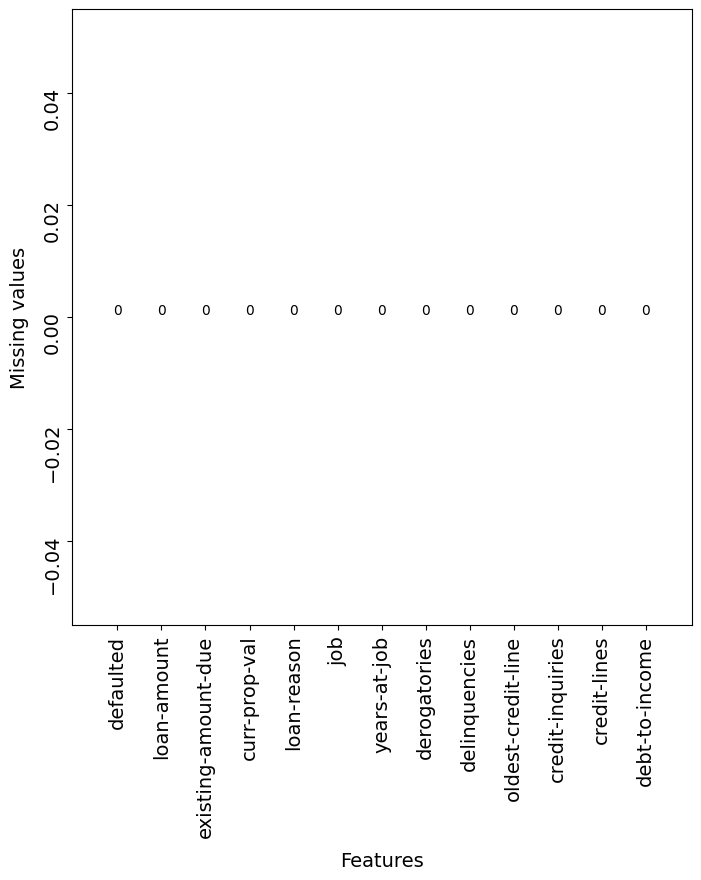

In [12]:
labels = [str(idx) for idx in data.isna().sum(axis=0).index]
values = data.isna().sum(axis=0).values
plotting.plot_hist(labels, values, '', 'Features', 'Missing values', figsize=(8,8),
                   rotated_ticks=True, save_path=hmeq_prep_dataset_path + 'missing_values-2.pdf')

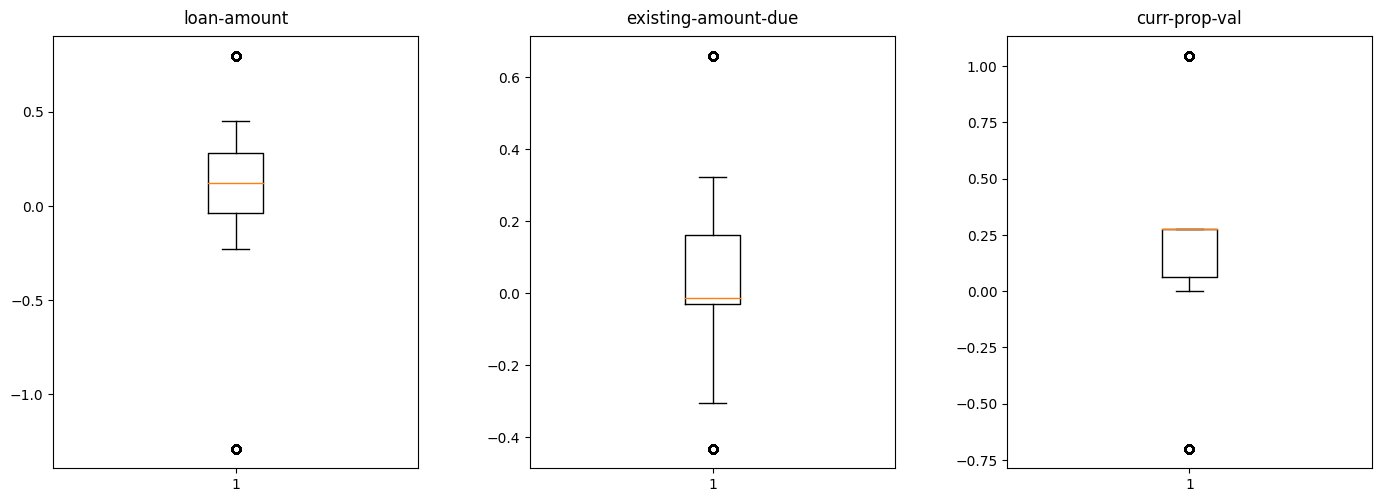

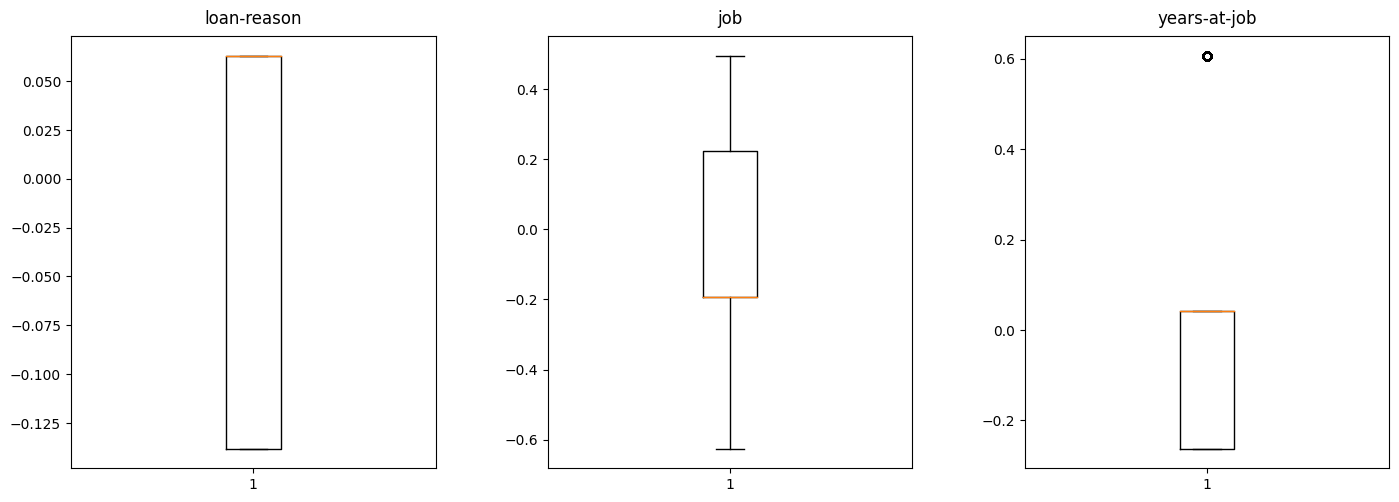

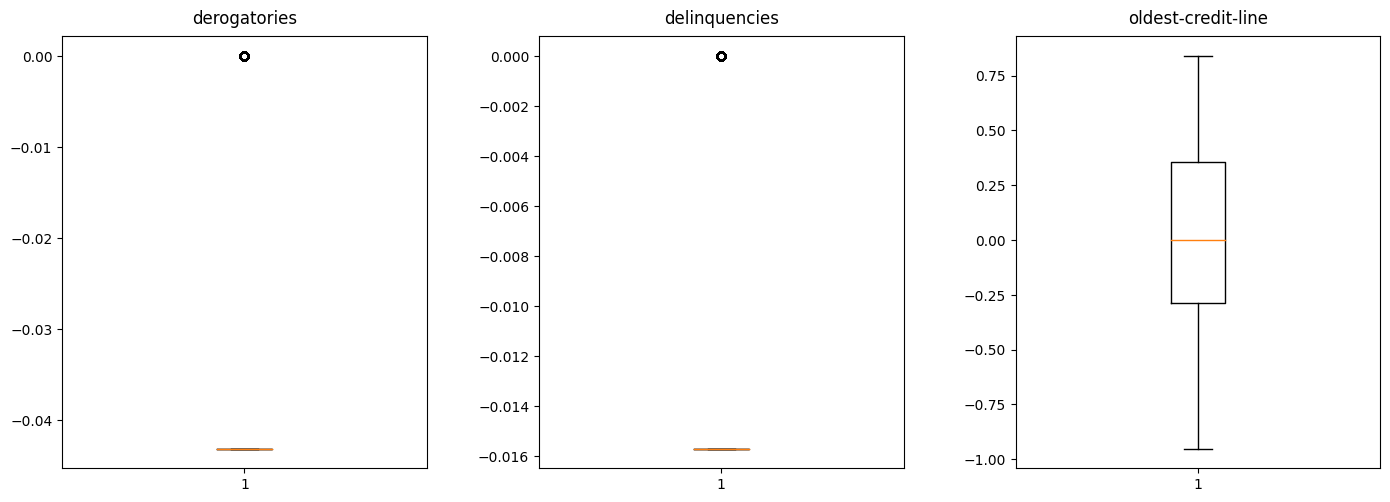

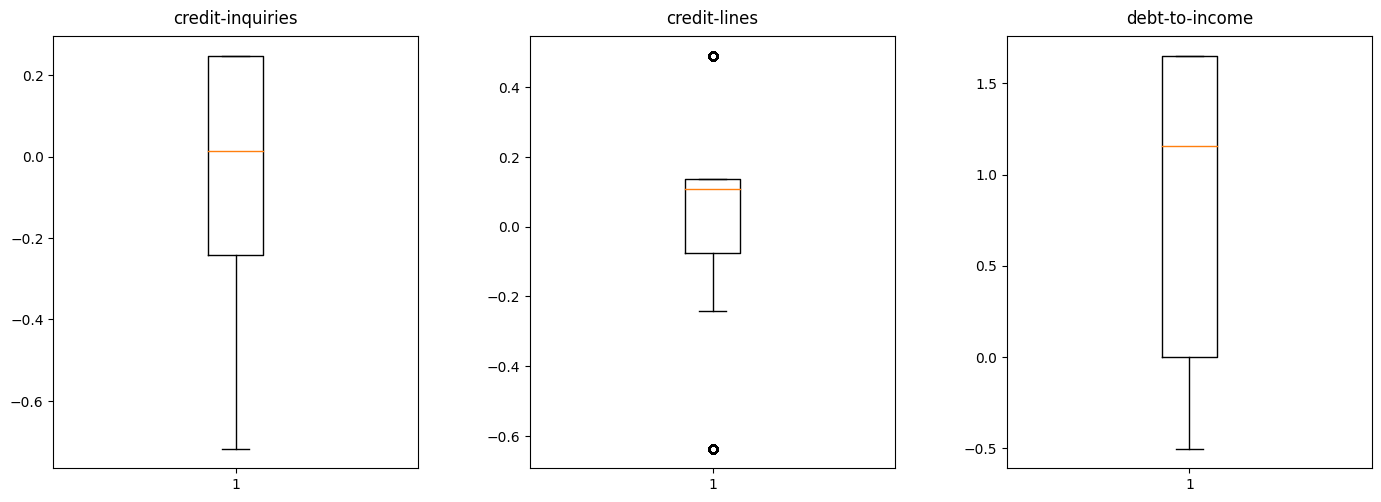

In [13]:
plotting.plot_numerical_boxplots(data, size=(15, 6), save_path=hmeq_prep_dataset_path)

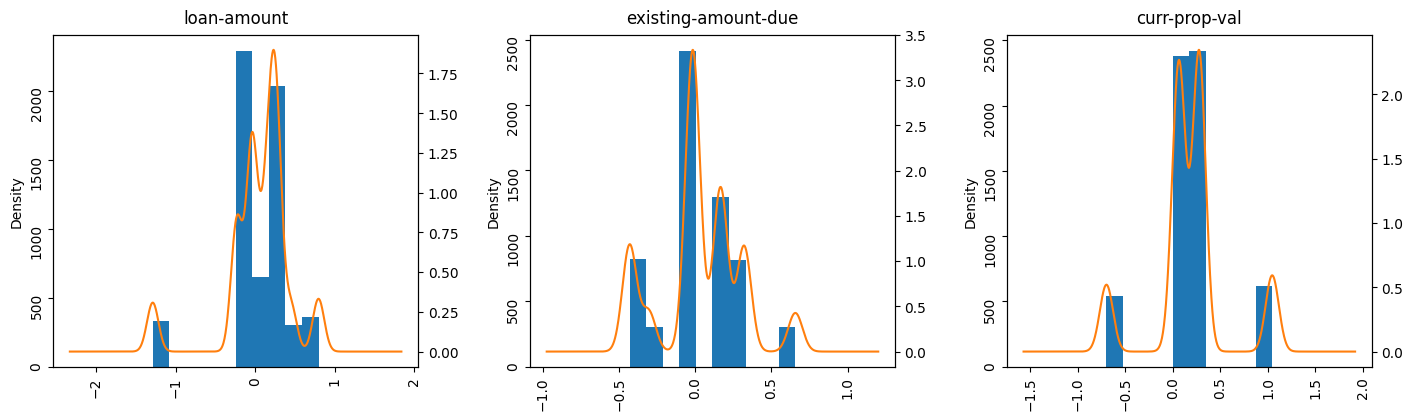

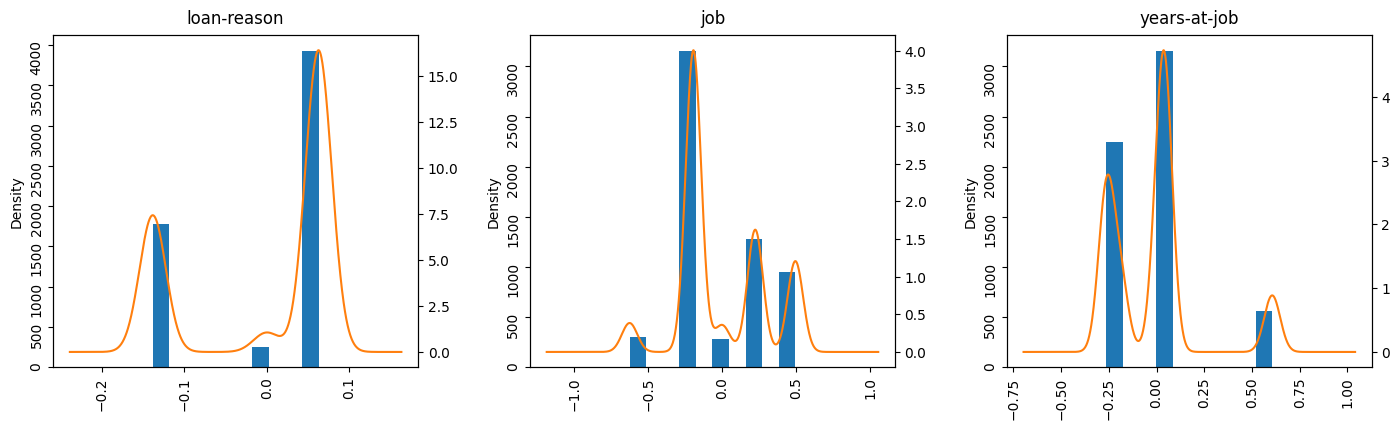

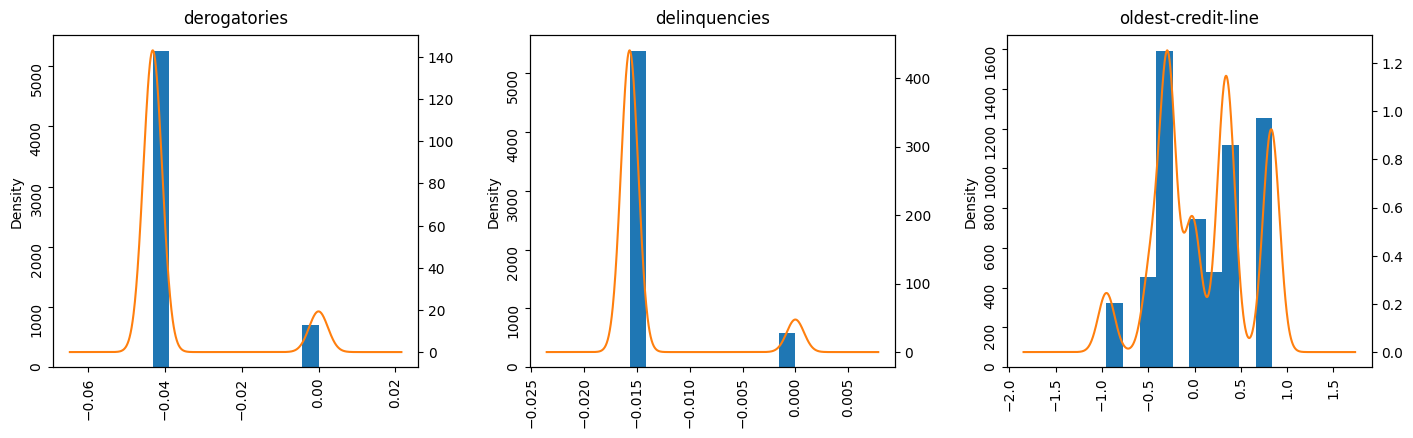

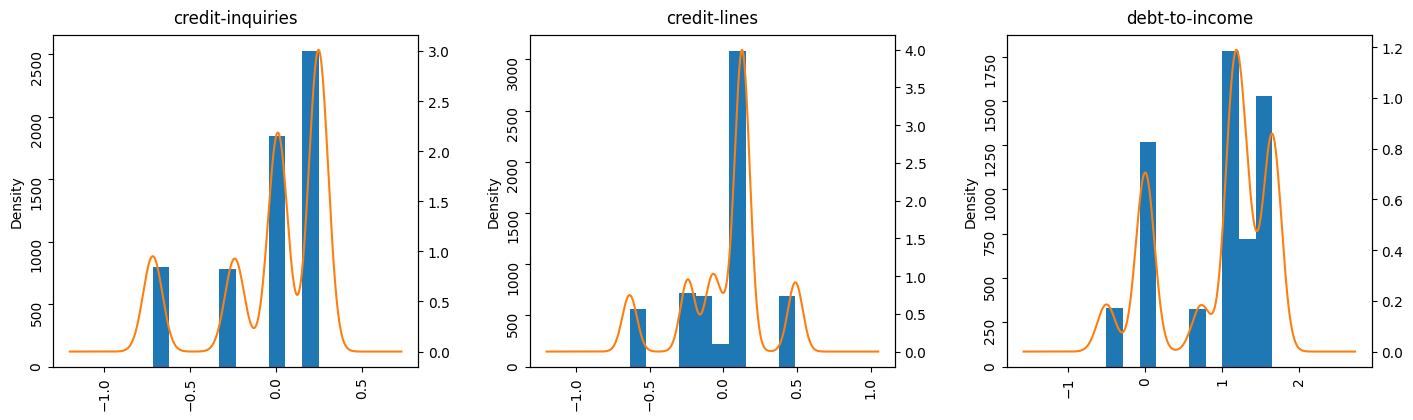

In [14]:
plotting.plot_numerical_hist_kde(data, size=(15,5), save_path=hmeq_prep_dataset_path)

#### Plot samples count before and after Data cleaning.

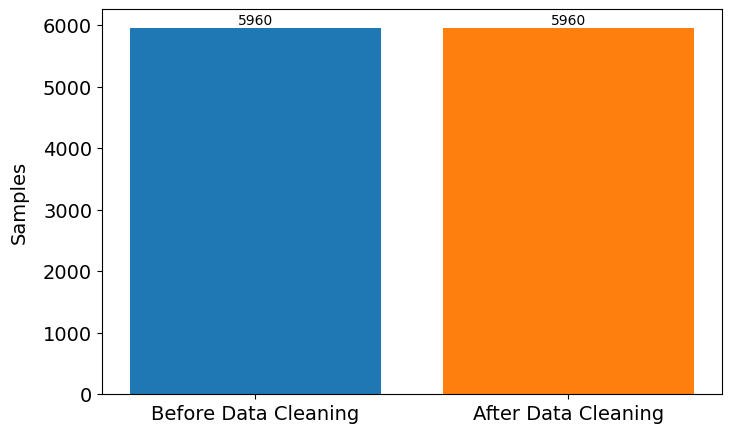

In [15]:
after_data_cleaning_count = len(data)
labels = ['Before Data Cleaning', 'After Data Cleaning']
values = [before_data_cleaning_count, after_data_cleaning_count]
plotting.plot_hist(labels, values, '', '', 'Samples', figsize=(8,5), rotated_ticks=False,
                   save_path=hmeq_prep_dataset_path + 'before_after.pdf')

#### Features IV scores

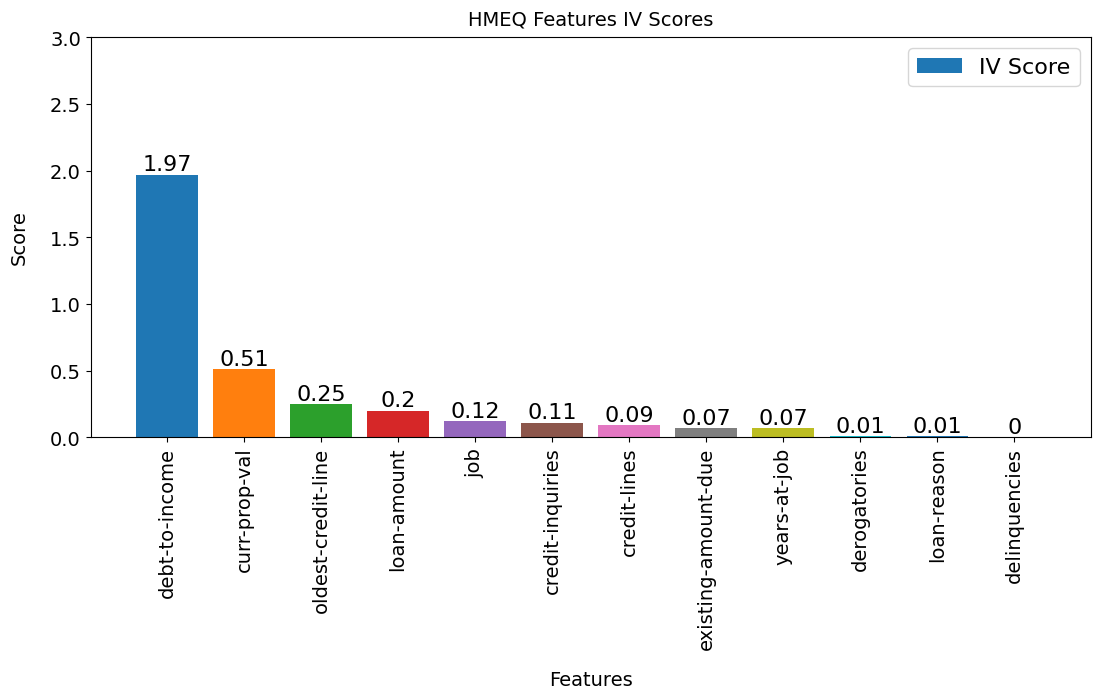

In [16]:
plotting.plot_features_scores(list(features_scores.keys()), list(features_scores.values()), 'HMEQ Features IV Scores')

#### Features correlation

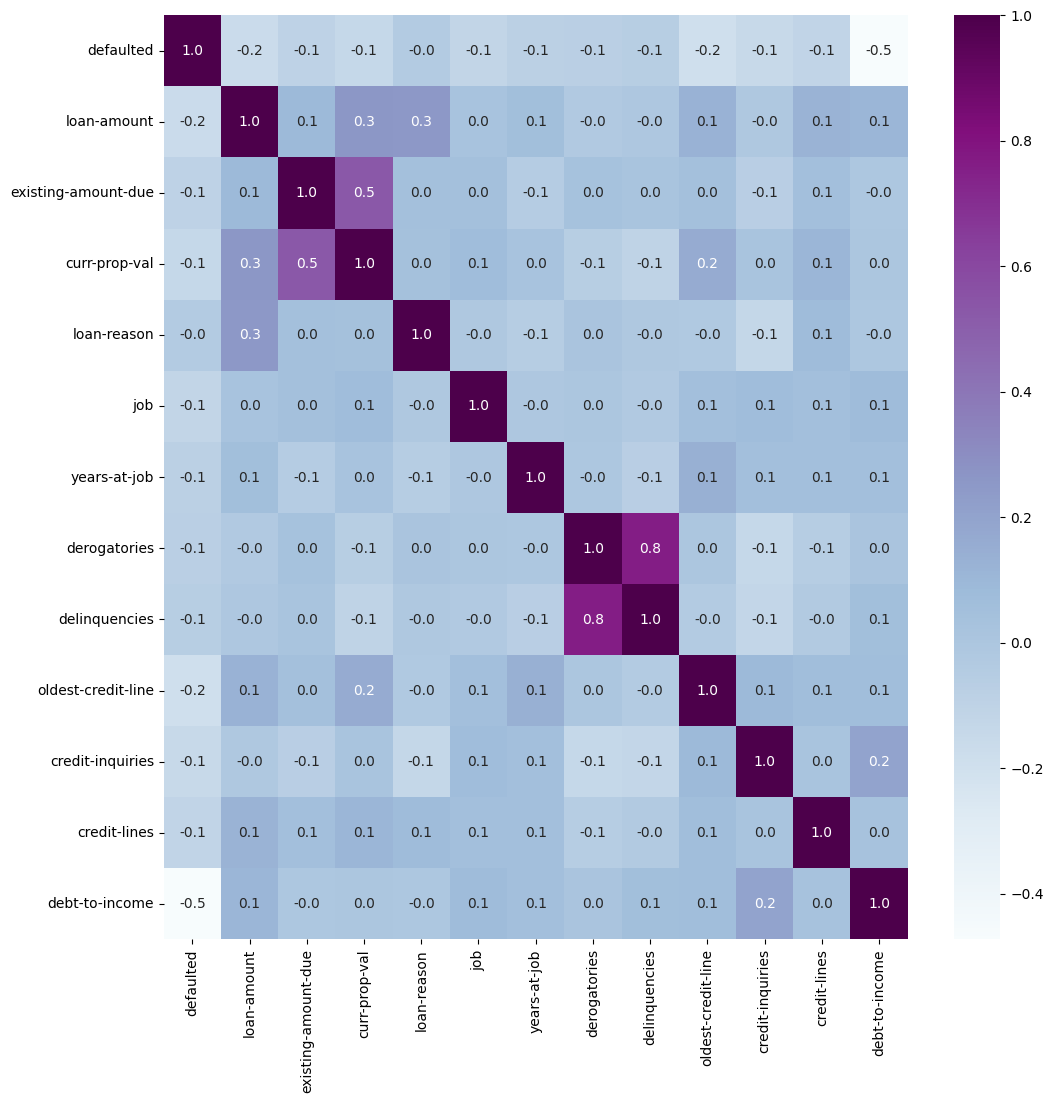

In [17]:
f_corr = preprocessing.features_correlation(data=data)
plotting.plot_heatmap(f_corr, figsize=(12, 12), save_path=hmeq_prep_dataset_path, dpi=100)

#### Drop redundant features using IV score.

In [18]:
data.drop(['delinquencies'], axis=1, inplace=True)

In [19]:
del features_scores['delinquencies']

#### Save preprocessed dataset.

In [20]:
data

,defaulted,loan-amount,existing-amount-due,curr-prop-val,loan-reason,job,years-at-job,derogatories,oldest-credit-line,credit-inquiries,credit-lines,debt-to-income
0,True,-1.287425,-0.431024,-0.700352,-0.138124,-0.192353,0.042021,-0.04317,-0.289117,0.014560,-0.636674,0.000000
1,True,-1.287425,-0.012169,0.063699,-0.138124,-0.192353,0.042021,-0.04317,-0.289117,0.247366,0.106763,0.000000
2,True,-1.287425,-0.431024,-0.700352,-0.138124,-0.192353,-0.189359,-0.04317,-0.289117,0.014560,0.106763,0.000000
3,True,-1.287425,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,False,-1.287425,0.321084,0.275257,-0.138124,0.495199,-0.262513,-0.04317,-0.289117,0.247366,0.106763,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5955,False,0.123861,-0.012169,0.275257,0.062752,-0.192353,0.042021,-0.04317,0.357867,0.247366,0.135509,1.155035
5956,False,0.123861,-0.030762,0.275257,0.062752,-0.192353,0.042021,-0.04317,0.357867,0.247366,0.135509,1.155035
5957,False,0.123861,-0.030762,0.275257,0.062752,-0.192353,0.042021,-0.04317,0.357867,0.247366,0.135509,1.155035
5958,False,0.123861,-0.030762,0.275257,0.062752,-0.192353,0.042021,-0.04317,0.357867,0.247366,0.135509,1.314381


In [21]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   defaulted            5960 non-null   bool   
 1   loan-amount          5960 non-null   float64
 2   existing-amount-due  5960 non-null   float64
 3   curr-prop-val        5960 non-null   float64
 4   loan-reason          5960 non-null   float64
 5   job                  5960 non-null   float64
 6   years-at-job         5960 non-null   float64
 7   derogatories         5960 non-null   float64
 8   oldest-credit-line   5960 non-null   float64
 9   credit-inquiries     5960 non-null   float64
 10  credit-lines         5960 non-null   float64
 11  debt-to-income       5960 non-null   float64
dtypes: bool(1), float64(11)
memory usage: 518.1 KB


**EMP-$p_1$:**

In [22]:
len(data[data['defaulted'] == True])/len(data)

0.199496644295302

**EMP-$p_0$:**

In [23]:
len(data[data['defaulted'] == False])/len(data)

0.800503355704698

In [24]:
utilities.save_dataset(data=data, features_scores=features_scores, test_size=0.2,
                       save_path=hmeq_prep_dataset_path)

Train split size: 4768
Test split size: 1192
